In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading Our Dataset

In [3]:
ntf=pd.read_csv(r"C:\Users\DELL\Downloads\Netflix Userbase.csv")
ntf.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-2022,10-06-2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-2021,22-06-2023,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-2023,27-06-2023,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-2022,26-06-2023,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-2023,28-06-2023,Germany,33,Male,Smartphone,1 Month


In [4]:
ntf.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [5]:
ntf.shape

(2500, 10)

In [6]:
ntf.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [7]:
ntf=ntf.astype({"Join Date":"datetime64[ns]","Last Payment Date":"datetime64[ns]"})
ntf.dtypes

User ID                       int64
Subscription Type            object
Monthly Revenue               int64
Join Date            datetime64[ns]
Last Payment Date    datetime64[ns]
Country                      object
Age                           int64
Gender                       object
Device                       object
Plan Duration                object
dtype: object

# Gender Analysis


In [8]:
gen_uni=ntf['Gender'].unique()
no_g=[]
for i in gen_uni:
    no_g.append(ntf['Gender'].loc[ntf['Gender']==i].shape[0])

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

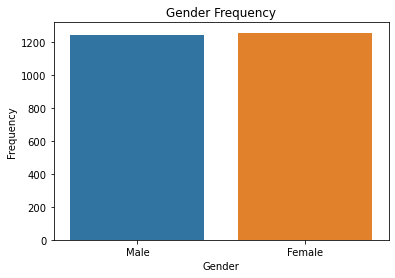

In [10]:
sns.barplot(x=gen_uni,y=no_g)
plt.title("Gender Frequency")
plt.xlabel("Gender")
plt.ylabel("Frequency")

# Age Analysis


In [11]:
ntf['Age'].describe()

count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: Age, dtype: float64

In [12]:
# Checking for null values
ntf['Age'].isnull().sum()

0

In [13]:
# Calculating the frequency for each Age and appending it into a list
age_uni=ntf['Age'].unique()
no_a=[];
for i in age_uni:
    no_a.append(ntf['Age'].loc[ntf['Age']==i].shape[0])

Text(0, 0.5, 'Frequency')

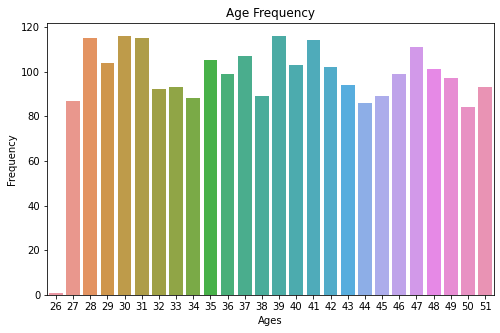

In [14]:
# A bar chart depicting the number of people of each age group
plt.figure(figsize=(8,5))
sns.barplot(x=age_uni,y=no_a)
plt.title('Age Frequency')
plt.xlabel('Ages')
plt.ylabel('Frequency')


# Country Analysis

In [15]:
ntf['Country'].describe()

count              2500
unique               10
top       United States
freq                451
Name: Country, dtype: object

In [16]:
# Checking for NULL values
ntf['Country'].isnull().sum()

0

In [17]:
coun_uni=ntf['Country'].unique()
no_c=[]
for i in coun_uni:
    no_c.append(ntf['Country'].loc[ntf['Country']==i].shape[0])

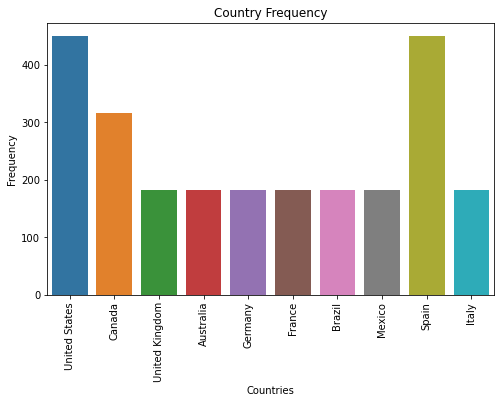

In [18]:
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(x=coun_uni,y=no_c,ax=ax)
plt.title("Country Frequency")
plt.xlabel("Countries")
plt.ylabel("Frequency")
axis_rot=ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Device Analysis

In [19]:
dev_uni=ntf['Device'].unique()
no_d=[];
for i in dev_uni:
    no_d.append(ntf['Device'].loc[ntf['Device']==i].shape[0])

Text(0, 0.5, 'Frequency')

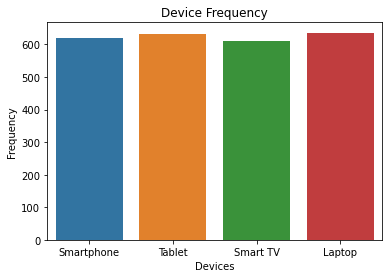

In [20]:
sns.barplot(x=dev_uni,y=no_d)
plt.title("Device Frequency")
plt.xlabel("Devices")
plt.ylabel("Frequency")

# Further Analysis

Text(0.5, 1.0, 'Join Date Density')

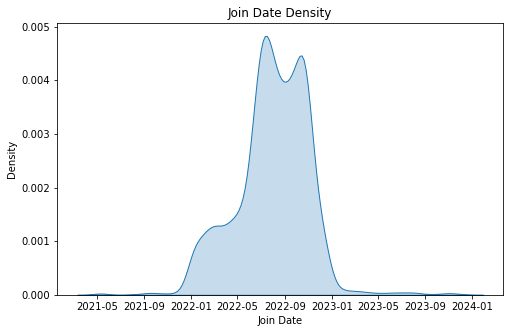

In [21]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=ntf['Join Date'], fill=True)
plt.title("Join Date Density")

In [22]:
ntf.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [23]:
sub_type=ntf['Subscription Type'].unique()
no_s=[]
for i in sub_type:
    no_s.append(ntf['Subscription Type'].loc[ntf['Subscription Type']==i].shape[0])

Text(0.5, 1.0, 'How popular is each subscription plan?')

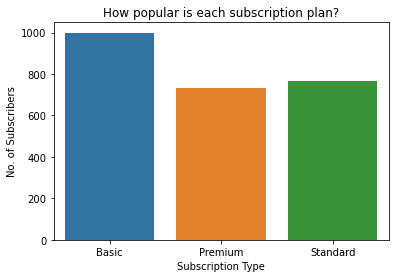

In [24]:
sns.barplot(x=sub_type,y=no_s)
plt.xlabel("Subscription Type")
plt.ylabel("No. of Subscribers")
plt.title("How popular is each subscription plan?")